<a href="https://colab.research.google.com/github/hitsaikateie/Capstone-project-Regression-and-Classification/blob/main/Credit_Card_Default_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Credit Card Default Prediction



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member 1 -** Saikat Halder
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

**Data Preprocessing** :

1. Getting the dataset
2. Importing libraries
3. Importing datasets
4. Finding Missing Data
5. Encoding Categorical Data
6. Data Cleaning and Feature Engineering

# **GitHub Link -**

https://github.com/hitsaikateie/Capstone-project-Regression-and-Classification/tree/3754d9567091ef5479e1c93f5f6388f74d8245b7


# **Problem Statement**


Defaulted credit card refers to a situation where a credit cardholder fails to make the required minimum payments on their credit card account for a certain period of time, typically several consecutive months. As a result, the credit card issuer or the lending institution considers the account in default and takes actions to recover the outstanding balance. However, If the credit card issuer or the lending institution is not able recover the outstanding then its a financial loss to them and also on the other hand it impacts the customers in a negetaive way to their credit score as well as credit profile. So in this project our aim will be to build a model which will help top predict whether a customer will deafault the payment of his/her credit card so that the banks can understand the characteristics that lead to this outcome.

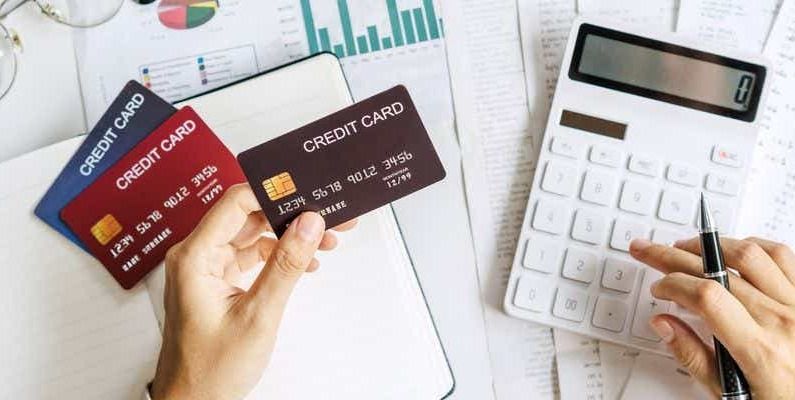

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px

from datetime import datetime

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.neighbors import KNeighborsClassifier
import sklearn.metrics as metrics
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_score, recall_score, roc_auc_score,f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

import warnings
warnings.filterwarnings("ignore")

### Dataset Loading

In [ ]:
# Load Dataset
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
path = '/content/default of credit card clients.xls'

Cr_df = pd.read_excel(path)

### Dataset First View

In [ ]:
# Dataset First Look
Cr_df.head()

In [ ]:
rename_list = ['ID','max_credit_given', 'gender', 'education', 'marital_status', 'age',
'pay_status_sept', 'pay_status_aug', 'pay_status_july', 'pay_status_june', 'pay_status_may', 'pay_status_april',
'bill_sept', 'bill_aug', 'bill_july', 'bill_june', 'bill_may', 'bill_april',
'payment_sept', 'payment_aug', 'payment_jul', 'payment_jun', 'payment_may', 'payment_april', 'default']
col_rename = dict(zip(Cr_df.columns,rename_list))
Cr_df = Cr_df.rename(columns=col_rename)

In [ ]:
Cr_df=Cr_df.drop(Cr_df.index[[0]],axis=0)

In [ ]:
Cr_df.head()

### Dataset Rows & Columns count

In [ ]:
# Dataset Rows & Columns count
Cr_df.shape

### Dataset Information

In [ ]:
# Dataset Info
Cr_df.info()

#### Duplicate Values

In [ ]:
# Dataset Duplicate Value Count
Cr_df.duplicated().sum()

In [ ]:
print(f' We have {Cr_df.duplicated().sum()} duplicate values in dataset.')

#### Missing Values/Null Values

In [ ]:
# Missing Values/Null Values Count
Cr_df.isna().sum().sort_values(ascending=False)

In [ ]:
# Visualizing the missing values
plt.figure(figsize=(15,5))
sns.heatmap(Cr_df.isnull(),cmap='plasma',annot=False,yticklabels=False)
plt.title(" Visualising Missing Values")

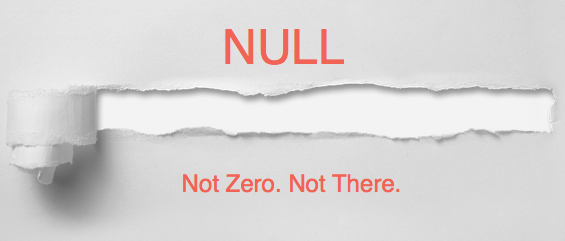

There are no missing values in the data set.

### What did you know about your dataset?

The given data set contains 300001 rows and 25 columns. There are 24 independent variables and 1 target variable in our data set. The initial problem was that by reading by just checking the information using python codes it is difficult to understand which column is indicating which information. so for that we have renamed the columns as all the columns are named as X and Y. Y variable which is now renamed here as 'default' is our target Variable that we will have to predict.

## ***2. Understanding Your Variables***

In [ ]:
# Dataset Columns
Cr_df.columns

In [ ]:
# Dataset Describe
Cr_df.describe(include='all')

### Variables Description

The name of the individual varriables mentioned in the columns of the data set and the descriptions of them are listed below:

⦁	**ID:**  Serial number of the Customers

⦁	**max_credit_given :** Maximum amount of credit provided to the customer

⦁	**gender:** Gender of the customers.(Categorical)

⦁	**education**: Qualification of the customers.(Categorical)

⦁	**marital_status :** Indicates whether the customer is married or unmarried.(Categorical)

⦁	**age:** Age of the customer.

⦁	**pay_status_sept:** Payment status of that perticular month of the customer. Indicates the number of times customer delayed the payment.

⦁	**pay_status_aug:** Payment status of that perticular month of the customer.Indicates the number of times customer delayed the payment.

⦁	**pay_status_july:** Payment status of that perticular month of the customer.Indicates the number of times customer delayed the payment.

⦁ **pay_status_june:** Payment status of that perticular month of the customer.Indicates the number of times customer delayed the payment.

⦁	**pay_status_may**: Payment status of that perticular month of the customer.Indicates the number of times customer delayed the payment.

⦁	**pay_status_april:** Payment status of that perticular month of the customer.Indicates the number of times customer delayed the payment.

⦁	**bill_sept:** Billed amount of that perticular month.

⦁	**bill_aug:** Billed amount of that perticular month.

⦁	**bill_july:** Billed amount of that perticular month.

⦁	**bill_june:** Billed amount of that perticular month.

⦁	**bill_may :** Billed amount of that perticular month.

⦁	**bill_april:** Billed amount of that perticular month.

⦁	**payment_sept:** Paid amount of that perticular month.

⦁	**payment_aug:** Paid amount of that perticular month.

⦁	**payment_jul:** Paid amount of that perticular month.

⦁	**payment_jun:** Paid amount of that perticular month.

⦁	**payment_may:** Paid amount of that perticular month.

⦁	**payment_april:** Paid amount of that perticular month.

⦁	**default:** Whether the customer defaaulted or not.(0 indicates 'no' and 1 indicates 'yes')

### Check Unique Values for each variable.

In [ ]:
# Check Unique Values for each variable.
for items in Cr_df.columns.tolist():
  print('The number of uniques values in column',items,'is', Cr_df[items].nunique())

In [ ]:
for items in Cr_df.columns.tolist():
  print('The number of uniques values in column',items,'is', Cr_df[items].unique())

## 3. ***Data Wrangling***

### Data Wrangling Code

In [ ]:
# Write your code to make your dataset analysis ready.
# changing all values from objects to
Cr_df = Cr_df.apply(pd.to_numeric, errors='coerce')

In [ ]:
Cr_df.info()

In [ ]:
Cr_df.describe()

In [ ]:
#Droping the ID column as it is not important for the analysis
Cr_df=Cr_df.drop(['ID'],axis=1)

In [ ]:
Cr_df.head()

Now let's check the categorical variables whiche are 'gender','education','marital status'.

In [ ]:
Cr_df['gender'].value_counts()

In [ ]:
Cr_df['education'].value_counts()

In [ ]:
Cr_df['marital_status'].value_counts()

The gender column has only two values as 1 and 2 which is fine.

Here we can see that there are more varities in the education column as well as in marital status column. Definitely that needs to be fixed.

In [ ]:
#fixing the education column for the values of 5,6 and 0 by replacing them with 4
edu = (Cr_df.education == 5) | (Cr_df.education == 6) | (Cr_df.education == 0)
Cr_df.loc[edu, 'education'] = 4

#fixing 'marital_status' column by replacing the 0 or unknown category with 3
Cr_df.loc[Cr_df.marital_status == 0, 'marital_status'] = 3

In [ ]:
#All the pay status column are having three values as -1,0,-2 indicating as payment was made in time which corresponds to no delay.
#so we can replace this no delay of payment with one perticular value as -1 to have a clear understanding.
#september
status = (Cr_df.pay_status_sept == -2) | (Cr_df.pay_status_sept == 0)
Cr_df.loc[status, 'pay_status_sept'] = -1

#august
status = (Cr_df.pay_status_aug == -2) | (Cr_df.pay_status_aug == 0)
Cr_df.loc[status, 'pay_status_aug'] = -1

#july
status = (Cr_df.pay_status_july == -2) | (Cr_df.pay_status_july == 0)
Cr_df.loc[status, 'pay_status_july'] = -1

#june
status = (Cr_df.pay_status_june == -2) | (Cr_df.pay_status_june == 0)
Cr_df.loc[status, 'pay_status_june'] = -1

#may
status = (Cr_df.pay_status_may == -2) | (Cr_df.pay_status_may == 0)
Cr_df.loc[status, 'pay_status_may'] = -1

# april
status = (Cr_df.pay_status_april == -2) | (Cr_df.pay_status_april == 0)
Cr_df.loc[status, 'pay_status_april'] = -1

In [ ]:
#Lets look at the changes
Cr_df[['pay_status_sept', 'pay_status_aug', 'pay_status_july', 'pay_status_june', 'pay_status_may', 'pay_status_april']].describe()

In [ ]:
Cr_df[['gender','education','marital_status']] = Cr_df[['gender','education','marital_status']].astype('object')

### What all manipulations have you done and insights you found?

First the entitre data was changed to integer type information. The Id column was deleted since it has no importance in the analysis. There are three categorical variables in the data as 'gender', 'education','marital status'. The gender column has only two values as 1 and 2 which is fine. But there were more varities in the information under education and marital status. so I have replaced the unknown values in those columns with the category values which have lowest number of values after them.All the pay status column are having three values as -1,0,-2 indicating as payment was made in time which corresponds to no delay.Also all the pay status column are having three values as -1,0,-2 indicating as payment was made in time which corresponds to no delay.so I have replaced these no delays of payment with one perticular value as -1 to have a clear understanding.

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

In [ ]:
def get_count_from_column(df,column_label):
  df_grpd=df[column_label].value_counts()
  df_grpd= pd.DataFrame({'index':df_grpd.index,'count':df_grpd.values})
  return df_grpd

In [ ]:
# Chart - 1 visualization code
#now lets visualize our target variable with a simple pie chart.
def plot_piechart_from_column(df,column_label,t1,exp):
   df_grpd=get_count_from_column(df,column_label)
   fig, ax=plt.subplots(figsize=(6,4))
   ax.pie(df_grpd.loc[:, 'count'], labels=df_grpd.loc[:, 'index'], autopct='%1.2f%%',startangle=90, shadow=False, labeldistance=1, explode=exp)
   plt.title(t1,bbox={'facecolor':'0.10','pad':6})
   ax.axis('equal')
   plt.legend()
   plt.show()

In [ ]:
exp1=[0.02,0.02]
plot_piechart_from_column(Cr_df,'default','Default percentage', exp1)

##### 1. Why did you pick the specific chart?

The above chart visualizes the percentage of defaulters in the data set.

##### 2. What is/are the insight(s) found from the chart?

77.88% customers were paid the due amount and only 22.12% of the customers are the defaulters.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

The gained insight showing a heavy class imbalance which we will have to tackle to get the correct predictions.

**Univariate analysis**

#### Chart - 2

In [ ]:
numeric_features = Cr_df.describe().columns

In [ ]:
numeric_features

In [ ]:
# Chart - 2 visualization code
for col in numeric_features[:-1]:
    fig = plt.figure(figsize=(9, 6))
    ax = fig.gca()
    feature = Cr_df[col]
    feature.hist(bins=50, ax = ax)
    ax.axvline(feature.mean(), color='Red', linestyle='dashed', linewidth=2)
    ax.axvline(feature.median(), color='magenta', linestyle='dashed', linewidth=2)
    ax.set_title(col)
plt.show()

##### 1. Why did you pick the specific chart?

As histogram is a very popular tool so the chart will show the overview of each and every varriables information and gives a clear idea about the data set. It also sumarizes the measured data.

##### 2. What is/are the insight(s) found from the chart?

All the above charts are the part of univariate analysis of the data for numerical variables. Basically these charts are indicating the distribution and skewness of the data as these two factors always play an important role for the analysis.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes. Definitely these all analysis will help us to understand the charaterisics of the data which will help to build the machine learning algorithm later on.

#### Chart - 3

In [ ]:
categorical_features = Cr_df[['gender','education','marital_status']]

In [ ]:
# Chart - 3 visualization code
fig = plt.figure(figsize=(8,15))
c=1
for i in categorical_features :
    plt.subplot(3, 1, c)
    plt.xlabel('Distibution of {}'.format(i))
    sns.countplot(x=i,data=Cr_df)
    c = c + 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

##### 1. Why did you pick the specific chart?

To visualize behaviour of the categorical variables the above charts were used.

##### 2. What is/are the insight(s) found from the chart?

*   The gender 2 has more frequent habbit of taking credits
*   In education column and marital status column the education 2 and marital status 2 has more frequent habbit of taking credits.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes, The above gained insights will help to understand which category of customers have the more frequent habbit of taking credit.

#### Chart - 4
**Bivariate analysi**s

In [ ]:
# Chart - 4 visualization code
plt.figure(figsize=(20,20))
counter=1

for var in numeric_features[:-1]:
  plt.subplot(3,7,counter)
  sns.barplot(x=Cr_df['default'],y=Cr_df[var])
  plt.title(f'Default v/s {var}')
  counter=counter+1
  plt.tight_layout()

##### 1. Why did you pick the specific chart?

To show the behaviour of all other numeric independent variables with the default column(target variable) the above charts were used.

##### 2. What is/are the insight(s) found from the chart?

The above bivariate analysis show how the dafault is varrying from column to column. for an example if we see the relation between age column and default column then it is clear that the number of zeros and ones are same.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes as this analysis will help to understand the dafault column behavious from column to column.

#### Chart - 5

In [ ]:
# Chart - 5 visualization code
plt.figure(figsize=(8,10))
counter=1

for j in categorical_features:
  plt.subplot(3,1,counter)
  sns.barplot(x=Cr_df['default'],y=Cr_df[j])
  plt.title(f'Default v/s {j}')
  counter=counter+1
  plt.tight_layout()

##### 1. Why did you pick the specific chart?

To show the impact of categorical features to the default (taraget variable) the above chart was used.

##### 2. What is/are the insight(s) found from the chart?

From the above charts it can be clearly seen that the ratio between paid in time and default is same for all three categorical variables when seen individually.

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Yes it will definitely create a possitive business impact.

#### Chart - 6 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code
plt.figure(figsize=(15,12))
sns.heatmap(Cr_df.corr(), cmap="Spectral", cbar_kws={'shrink': .6}, square=True, annot=True, fmt='.2f', linewidths=.8)
plt.show()

##### 1. Why did you pick the specific chart?

To check the multicolinearity problem the above chart is used.

##### 2. What is/are the insight(s) found from the chart?

From the above corelation plot we can see that bill_april to september columns are highly correlated to each other which makes sense as these columns indicates the bill amounts.

Apart from that there are no highly correlated inputs in our dataset, so there is no multicollinearity problem.

#### Chart - 7 - Pair Plot

In [ ]:
# Pair Plot visualization code
sns.pairplot(Cr_df, hue="default")

##### 1. Why did you pick the specific chart?

Pair plot is used to understand the best set of features to explain a relationship between two variables or to form the most separated clusters.The Pairplot visualizes given data to find the relationship between them where the variables can be continuous or categorical.

##### 2. What is/are the insight(s) found from the chart?

As I have used default in the hue variable so the above plot will show the distribution of default with the different type of columns.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

There are no missing values in the dataset.

### 2. Handling Outliers

In [ ]:
#Checking for outliers

fig = plt.figure(figsize=(16,32))
c=1
for i in numeric_features :
    plt.subplot(7, 3, c)
    plt.xlabel('Distibution of {}'.format(i))
    sns.boxplot(x=i,data=Cr_df,color="purple")
    c = c + 1
plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

In [ ]:
# Handling Outliers & Outlier treatments
#Checking for outliers
#applying min max scaler
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(Cr_df)

cols = ['max_credit_given', 'gender', 'education', 'marital_status', 'age',
       'pay_status_sept', 'pay_status_aug', 'pay_status_july',
       'pay_status_june', 'pay_status_may', 'pay_status_april', 'bill_sept',
       'bill_aug', 'bill_july', 'bill_june', 'bill_may', 'bill_april',
       'payment_sept', 'payment_aug', 'payment_jul', 'payment_jun',
       'payment_may', 'payment_april', 'default']
fig=plt.figure(1, figsize=(25,15))
ax=fig.add_subplot(111)
sns.boxplot(data=scaled_data)
plt.xticks(np.arange(0,24), labels=cols, rotation=25, fontsize=18)
plt.yticks(fontsize=18)

plt.savefig('Fig - Boxplot')

In [ ]:
#applying standard scaler
scaler = StandardScaler()
scaled_data_1 = scaler.fit_transform(Cr_df)

In [ ]:
cols = ['max_credit_given', 'gender', 'education', 'marital_status', 'age',
       'pay_status_sept', 'pay_status_aug', 'pay_status_july',
       'pay_status_june', 'pay_status_may', 'pay_status_april', 'bill_sept',
       'bill_aug', 'bill_july', 'bill_june', 'bill_may', 'bill_april',
       'payment_sept', 'payment_aug', 'payment_jul', 'payment_jun',
       'payment_may', 'payment_april', 'default']
fig=plt.figure(1, figsize=(25,15))
ax=fig.add_subplot(111)
sns.boxplot(data=scaled_data_1)
plt.xticks(np.arange(0,24), labels=cols, rotation=25, fontsize=18)
plt.yticks(fontsize=18)

plt.savefig('Fig - Boxplot Std Scaler')

In [ ]:
#applying log scale to the data.
scaled_data_2=np.log10(Cr_df[numeric_features]).values
cols = ['max_credit_given', 'age',
       'pay_status_sept', 'pay_status_aug', 'pay_status_july',
       'pay_status_june', 'pay_status_may', 'pay_status_april', 'bill_sept',
       'bill_aug', 'bill_july', 'bill_june', 'bill_may', 'bill_april',
       'payment_sept', 'payment_aug', 'payment_jul', 'payment_jun',
       'payment_may', 'payment_april', 'default']
fig=plt.figure(1, figsize=(25,15))
ax=fig.add_subplot(111)
sns.boxplot(data=scaled_data_2)
plt.xticks(np.arange(0,21), labels=cols, rotation=25, fontsize=18)
plt.yticks(fontsize=18)

plt.savefig('Fig - Boxplot Std Scaler')

##### What all outlier treatment techniques have you used and why did you use those techniques?

The boxplots for each of the numerical features are plotted in order to have a further look at the distribution and to eventually spot outliers.
Here it can be seen clearly that there are lot of values which rae lying in the outlier section. so to tackle the outliers I applied three techniques to the entire data as minmaxscaler, standarscalar and log10 scale transformation.

But we can see that none of the techniques were able to solve the outlier problem completely. In addition to that since there are lot of values in the outliers part so it won't be a good idea to delete all the outliers.  

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns
Cr_df = pd.get_dummies(Cr_df)
Cr_df.head()

#### What all categorical encoding techniques have you used & why did you use those techniques?

Already I fixed the values in the catigorical values, gender, education and marital_status. Now these columns are dummied using hot encoding technique so that machine learning models can understand them. In addition to that already there are some feature engineering applied in the data manipulation section as replacing the unknown values in categorical columns also replacing the values of delayed payment with one valeu in the pay status april to september column.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

Already deleted the 'ID' column from the dataset as that information in not important for the analysis.

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting
corr=Cr_df.corr()
plt.figure(figsize=(25,10))
sns.heatmap(corr,annot=True, cmap=plt.cm.Accent_r)

We can see there are no such highly correlated varriables in our dataset apart from the bill columns.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data
# creating the set of dependent and independent variables
X = Cr_df.drop(labels='default', axis=1)
Y = Cr_df['default']


In [ ]:
# print the shape of X and Y
print(f"The Number of Rows and Columns in X is {X.shape} respectively.")
print(f"The Number of Rows and Columns in Y is {Y.shape} respectively.")

### 6. Data Scaling

In [ ]:
# Scaling your data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
X_scaled

##### Which method have you used to scale you data and why?

I have used standard scaler to the data so that its magnitudes are normalized. This could help the learning algorithms and speed up calculations.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.
X_train, X_test, Y_train, Y_test = train_test_split( X , Y , test_size = 0.2, random_state = 42)

##### What data splitting ratio have you used and why?

I have made the use of 80% and 20% Training and Testing data respectively.The data should be divided in such a way that neither of them is too high, which is more dependent on the ammount of data we have. If the data is too small, then no split will give satisfactory variance so we'll have to do cross-validation, but if the data is huge then it doesn’t really matter whether we choose an 80:20 split or a 90:10 split (indeed we may choose to use less training data as otherwise, it might be more computationally intensive).

### 9. Handling Imbalanced Dataset

In [ ]:
Cr_df['default'].value_counts()

##### Do you think the dataset is imbalanced? Explain Why.

Yes, definitely there is a class imbalance in the Target varriable. However we have already visualized the same in the exploratory data analysis section by using pie chart.


In [ ]:
# Handling Imbalanced Dataset (If needed)
#let's again check the distribution of the target varriable
plt.figure(figsize = (10,5))
ax = sns.countplot(data=Cr_df,x=Cr_df['default'], palette='Set3')

ax.set_title('Default vs Non-Default',fontsize = 20)
ax.set_xlabel('Status',fontsize = 15)
ax.set_ylabel('Count',fontsize = 15)
ax.set_xticklabels(['Didn\'t Default','Defaulted'],fontsize = 13)

# adding percentage to the top of each bar
total = float(len(Cr_df))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,
            height + 3,
            '{:1.2f}'.format(height/total * 100) + '%',
            ha="center")

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

As we can see that there is a class imbalance in the dataset so we will tackle the class imbalance by penalizing the machine learning algorithms.

## ***7. ML Model Implementation***

### ML Model - 1
**K Nearest Neighbors**

In [ ]:
# ML Model - 1 Implementation
knn = KNeighborsClassifier(n_neighbors=6, weights='distance')

# Fit the Algorithm
knn.fit(X_train, Y_train)

# Predict on the model
knn_y_pred_train = knn.predict(X_train)
knn_tree_y_pred_test = knn.predict(X_test)

In [ ]:
print('Untuned K Nearest Neighbors Model')
print("Training F1 Score: ", metrics.f1_score(Y_train, knn_y_pred_train))
print("Testing F1 Score: ", metrics.f1_score(Y_test, knn_tree_y_pred_test))

In [ ]:
t1_knn = metrics.f1_score(Y_train, knn_y_pred_train)
t2_knn = metrics.f1_score(Y_test, knn_tree_y_pred_test)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
metric_dict = {}
metric_dict['without cross KNN'] = {'Training F1': t1_knn, 'Testing F1': t2_knn}

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
k_near = KNeighborsClassifier(weights='distance')
# Fit the Algorithm
k_param_dict={'n_neighbors': range(4,15,1)}
grid_k_neighbors = GridSearchCV(k_near, k_param_dict, cv=5, scoring='f1', verbose=1)
grid_k_neighbors.fit(X_train, Y_train)
# Predict on the model
print('F1 Score:', grid_k_neighbors.best_score_)
print('Best Hyperparameters:', grid_k_neighbors.best_params_)
print('Model object with best parameters: ')
print(grid_k_neighbors.best_estimator_)

In [ ]:
#Predicting the response on both train and test data set respectively.
tuned_k_neighbors_y_pred_train = grid_k_neighbors.best_estimator_.predict(X_train)
tuned_k_neighbors_y_pred_test = grid_k_neighbors.best_estimator_.predict(X_test)

print('Tuned K Nearest Neighbors Predictions')
print("F1 on train set:",metrics.f1_score(Y_train, tuned_k_neighbors_y_pred_train))
print("F1 on test set:",metrics.f1_score(Y_test, tuned_k_neighbors_y_pred_test))

In [ ]:
train_tuned_knn = metrics.f1_score(Y_train, tuned_k_neighbors_y_pred_train)
test_tuned_knn = metrics.f1_score(Y_test, tuned_k_neighbors_y_pred_test)

In [ ]:
metric_dict['Tuned KNN'] = {'Training F1': train_tuned_knn, 'Testing F1': test_tuned_knn}

In [ ]:
metric_dict['Tuned KNN']

##### Which hyperparameter optimization technique have you used and why?

Since hyperparameter values are predefined so here grid search technique has been used to tune the hyper paramenter.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Yes. there is a slight improvement in the F1 score evaluation matrics. But it is very much clear that the above model is definitely not suitable for the predicting the default as the high evaluation metric F1 score in the train data indicates that the model has overfit in the data set.

### ML Model - 2
**Logisitic Regression**

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
logreg = LogisticRegression(C=1e9, class_weight='balanced')
logreg.fit(X_train, Y_train)
logreg_y_pred_train = logreg.predict(X_train)
logreg_y_pred_test = logreg.predict(X_test)


In [ ]:
print('Untuned Logistic Regression Model')
print("Training F1 Score: ", metrics.f1_score(Y_train, logreg_y_pred_train))
print("Testing F1 Score: ", metrics.f1_score(Y_test, logreg_y_pred_test))

In [ ]:
t1_log_reg = metrics.f1_score(Y_train, logreg_y_pred_train)
t2_log_reg = metrics.f1_score(Y_test, logreg_y_pred_test)

In [ ]:
# Visualizing evaluation Metric Score chart
metric_dict['without cross Logistic Regression'] = {'Training F1': t1_log_reg, 'Testing F1': t2_log_reg}

In [ ]:
y_pred_prob = logreg.predict_proba(X_test)[:, 1]

In [ ]:
# ROC Curve graph
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred_prob)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Logisitic Regression')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [ ]:
print(metrics.roc_auc_score(Y_test, y_pred_prob))

In [ ]:
print('accuracy:', metrics.accuracy_score(Y_test, logreg_y_pred_test))
print('precision:', metrics.precision_score(Y_test, logreg_y_pred_test))
print('recall:', metrics.recall_score(Y_test, logreg_y_pred_test))
print('f1 score:', metrics.f1_score(Y_test, logreg_y_pred_test))

In [ ]:
# confusion matrix
labels = ['Not default', 'default']
cm = confusion_matrix(Y_train, logreg_y_pred_train)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
labels = ['Not default', 'default']
cm = confusion_matrix(Y_test, logreg_y_pred_test)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
tuned_log = LogisticRegression(random_state=42, class_weight='balanced')
# Fit the Algorithm
log_param_dict={'C': range(3,7,1),
                'penalty': ['l1','l2']}
grid_log = GridSearchCV(tuned_log, log_param_dict, cv=5, scoring='f1', verbose=1)
grid_log.fit(X_train, Y_train)

In [ ]:
print('F1 Score:', grid_log.best_score_)
print('Best Hyperparameters:', grid_log.best_params_)
print('Model object with best parameters: ')
print(grid_log.best_estimator_)

In [ ]:
grid_log_y_pred_train = grid_log.best_estimator_.predict(X_train)
grid_log_y_pred_test = grid_log.best_estimator_.predict(X_test)

In [ ]:
print('Tuned Logistic Regression Model Predictions')
print("F1 on train set:",metrics.f1_score(Y_train, grid_log_y_pred_train))
print("F1 on test set:",metrics.f1_score(Y_test, grid_log_y_pred_test))

In [ ]:
train_tuned_log_reg = metrics.f1_score(Y_train, grid_log_y_pred_train)
test_tuned_log_reg = metrics.f1_score(Y_test, grid_log_y_pred_test)

In [ ]:
metric_dict['Tuned Logistic Regression'] = {'Training F1': train_tuned_log_reg, 'Testing F1': test_tuned_log_reg}

In [ ]:
metric_dict['Tuned Logistic Regression']

In [ ]:
labels = ['Not default', 'default']
cm = confusion_matrix(Y_test, grid_log_y_pred_test)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

In [ ]:
y_pred_prob_1 = grid_log.predict_proba(X_test)[:, 1]

In [ ]:
# ROC Curve graph
fpr, tpr, thresholds = metrics.roc_curve(Y_test, y_pred_prob_1)
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('ROC curve for Logisitic Regression')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [ ]:
print(metrics.roc_auc_score(Y_test, y_pred_prob_1))

##### Which hyperparameter optimization technique have you used and why?

Grid search cv technique has been issued for hyperparameter tunning.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

There in not much improvement noticed even after applying grid search CV. F1 score and roc_auc score remains same for both the cases.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation
svc_model = SVC(class_weight='balanced', probability=True)

# Fit the Algorithm
svc_model.fit(X_train, Y_train)

# Predict on the model
svc_predict = svc_model.predict(X_test)
svc_predict_train=svc_model.predict(X_train)

In [ ]:
print('ROC_AUC_score:',roc_auc_score(Y_test, svc_predict))
print('F1_score:',f1_score(Y_test, svc_predict))

In [ ]:
t1_svm = metrics.f1_score(Y_train, svc_predict_train)
t2_svm = metrics.f1_score(Y_test, svc_predict)

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart
metric_dict['without cross svm'] = {'Training F1': t1_svm, 'Testing F1': t2_svm}

In [ ]:
metric_dict['without cross svm']

In [ ]:
labels = ['Not default', 'default']
cm = confusion_matrix(Y_test, svc_predict)
print(cm)

ax= plt.subplot()
sns.heatmap(cm, annot=True, ax = ax) #annot=True to annotate cells

# labels, title and ticks
ax.set_xlabel('Predicted labels')
ax.set_ylabel('True labels')
ax.set_title('Confusion Matrix')
ax.xaxis.set_ticklabels(labels)
ax.yaxis.set_ticklabels(labels)

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***